## The economic well-being of a Nation is highly driven by the income of the residents.

Countless decisions in private and public sectors are based on Census data. Census data is the backbone of the democratic system of government, highly affecting the economic sectors. Census-related figures are used to distribute the federal funding by the government into different states and localities.
Not only the above, the census data is also used for post census population estimates and projections, economic and social science research, and many other such applications. Hence, the importance of this data and its correct predictions is very clear to us.
Data has always been the backbone of many important decisions. When an assumption is backed up by facts and numbers, the chances of incorrectness and bad decisions decrease.

## About the project

The above introduction had an aim to increase the awareness about how the income factor actually has an impact not only on the personal lives of people, but also an impact on the nation and its betterment. We will today have a look on the data extracted from the 1994 Census bureau database, and try to find insights about how different features have an impact on the income of an individual. Though the data is quite old, and the insights drawn cannot be directly used for derivation in the modern world, but it would surely help us to analyze what role different features play in predicting the income of an individual.

## Data Set


The dataset provided to us contains 32561 rows, and 14 different independent features. We aim to predict if a person earns more than 50k$ per year or not. Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem, and we will train the classification models to predict the desired outputs.

Data Dictionary : 
1. Age — The age of an individual, this ranges from 17 to 90.
2. Workclass — The class of work to which an individual belongs.
3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)
4. Education — Highest level of education
5. Education_num — Number of years for which education was taken
6. Marital_Status — Represents the category assigned on the basis of marriage status of a person
7. Occupation — Profession of a person
8. Relationship — Relation of the person in his family
9. Race — Origin background of a person
10. Sex — Gender of a person
11. Capital_gain — Capital gained by a person
12. Capital_loss — Loss of capital for a person
13. Hours_per_week — Number of hours for which an individual works per week
14. Native_Country — Country to which a person belongs
15. Income — The target variable, which predicts if the income is higher or lower than 50K$.

# Reading Data

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
os.chdir('C:/Users/Goels/Desktop/Projects/US-Income-Prediction---Decision-Trees-main')

In [6]:
#importing train and test data
train = pd.read_csv('adult-training.csv',header=None)
test = pd.read_csv('adult-test.csv',skiprows=1,header=None)

# Exploratory Data Analysis

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
#renaming columns
columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']
train.columns=columns
test.columns=columns
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking the numerical statistics :

In [10]:
#summary statistics of train data
train.describe()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<b> Key Inferences : </b><br>
1) Age of our sample lies between 17 and 90 years <br>
2) The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.<br>
3) There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.<br>
4) Hours worked per week range between 1–99 hours. 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We see that we have a mixture of categorical and numeric columns. We have 6 integer columns and 9 object type columns. We observe that the count of entries is 32561 for all columns, hence no NaN values are present in our dataset. we can reconfirm ny checking null values in our dataset as shown below:

In [12]:
#checking for null values
train.isna().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education_num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours/Week        0
Native_country    0
Income            0
dtype: int64

In [13]:
#checking unique values in each column
for i in range(train.shape[1]):
    print(train.columns[i])
    print(train.iloc[:,i].unique())

Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlgwt
[ 77516  83311 215646 ...  34066  84661 257302]
Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_Status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

Having a close look at our dataset, we observe some of the values as ‘?’, which represent missing values. Hence, we deduce that there are some values in our data set which need to be treated.

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


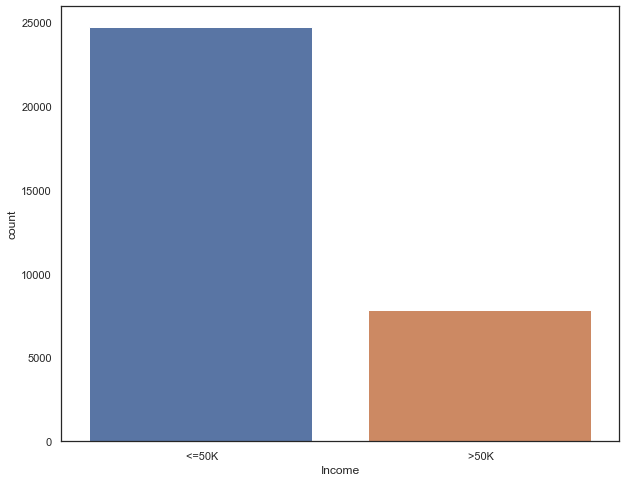

In [14]:
sns.set(rc = {'figure.figsize':(10, 8)})
sns.set_style("white")
sns.countplot(train.Income)

The income column is our target variable with 2 values — ‘<=50K’ and ‘>50K’. The count of these values is 24719 and 7841 respectively, suggesting that people with income higher than 50K are significantly less, and our data set is imbalanced considering the target variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000144F72213A0>,
      dtype=object)

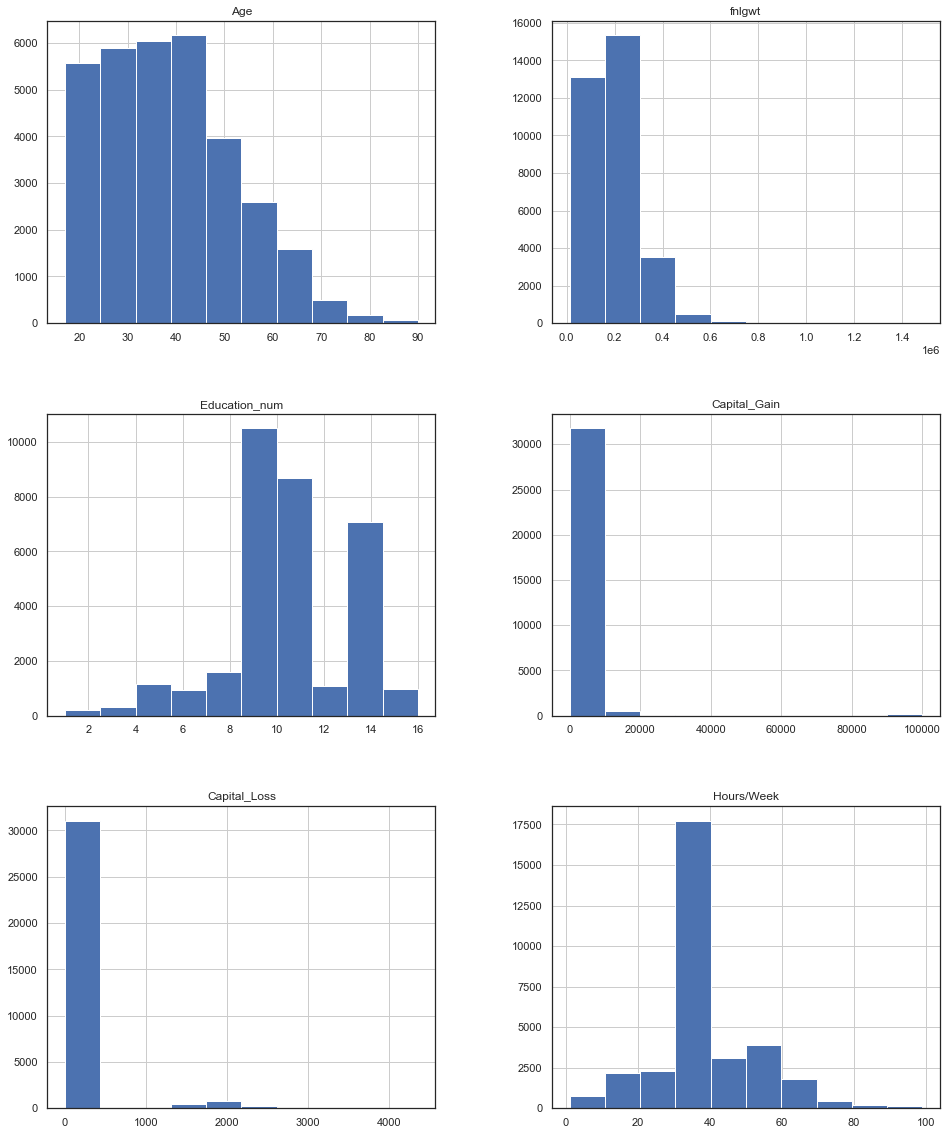

In [15]:
#Distribution of features
train.hist(figsize=(16,20))

<b>For Age column : </b><br>
We observe that our data is has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases. <br>
<b>For Education column : </b><br>
Highest level of Education for most people lies between 10-12 which inlcludes ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.
<b>For Capital Gain and Capital Loss Column :</b> <br>
Majority of their values are set as 0. The distribution plot for both of them are highly right skewed. <br>
<b>For Hours/Week : </b><br>
Majprity of people are working for approximately 40 hours/week and hence, we observe a peak around that time. 

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

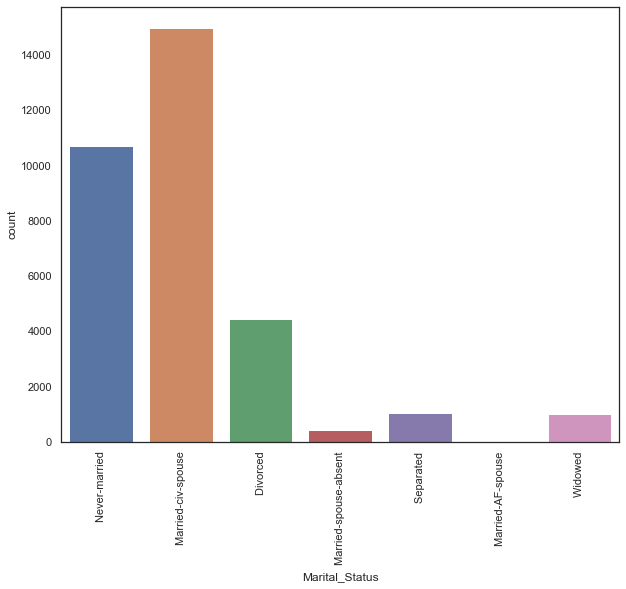

In [16]:
sns.countplot(train.Marital_Status)
plt.xticks(rotation = 90)

Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’ (i.e. corresponds to a civilian spouse), and least have ‘Married-AF-spouse’ (i.e. spouse in the Armed Forces). Count of ‘Never-married’ is also quite high.

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

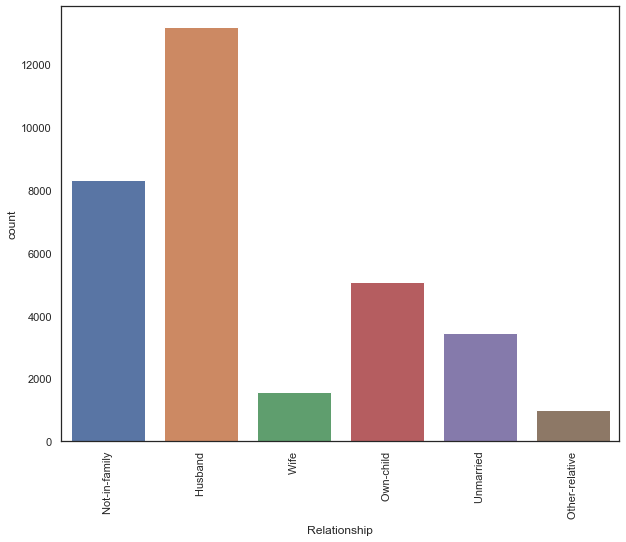

In [17]:
sns.countplot(train.Relationship)
plt.xticks(rotation = 90)

Majority of the people are either a married man ("Husband") or "Not-in'family" category. But it might be possible we do not have equal proportion of males and females in our data set. 

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

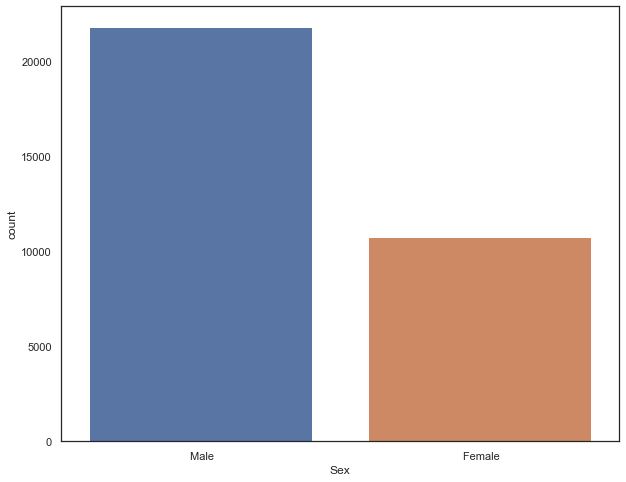

In [18]:
sns.countplot(train.Sex)
plt.xticks()

In our training data set, we observe that the number of males are higher than the number of females.

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

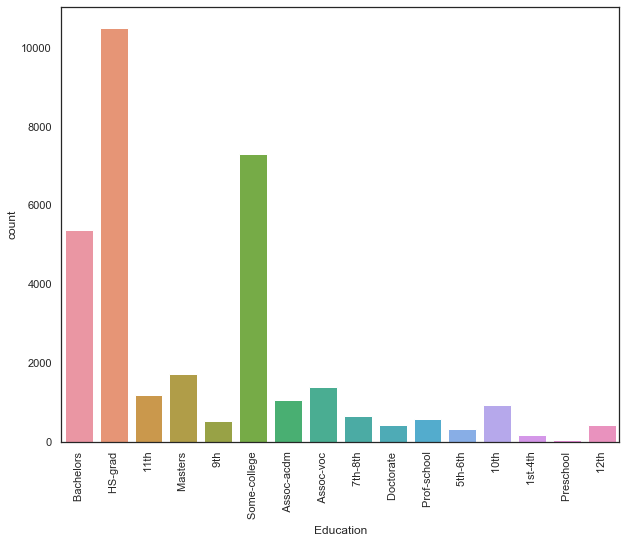

In [19]:
sns.countplot(train.Education)
plt.xticks(rotation = 90)

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

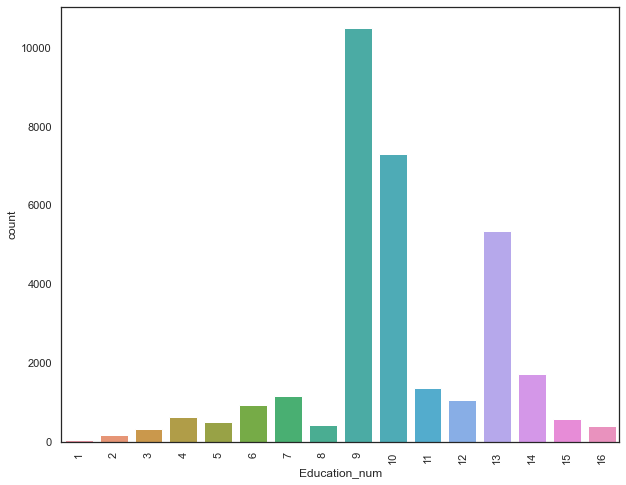

In [20]:
sns.countplot(train.Education_num)
plt.xticks(rotation = 90)

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


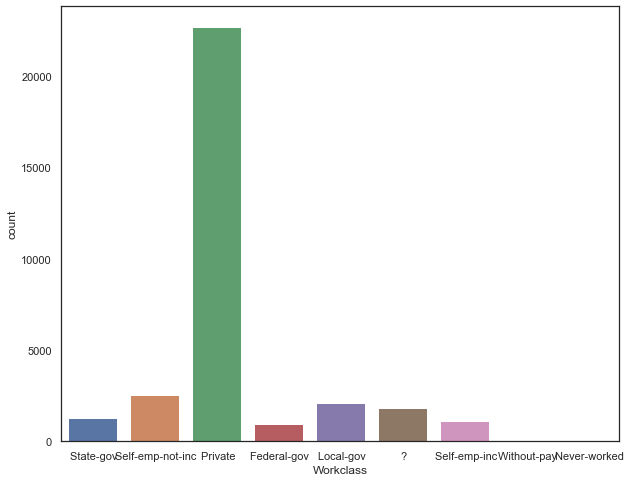

In [21]:
sns.countplot(train.Workclass)

We observe that majority of the people are working in Private sector. 

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

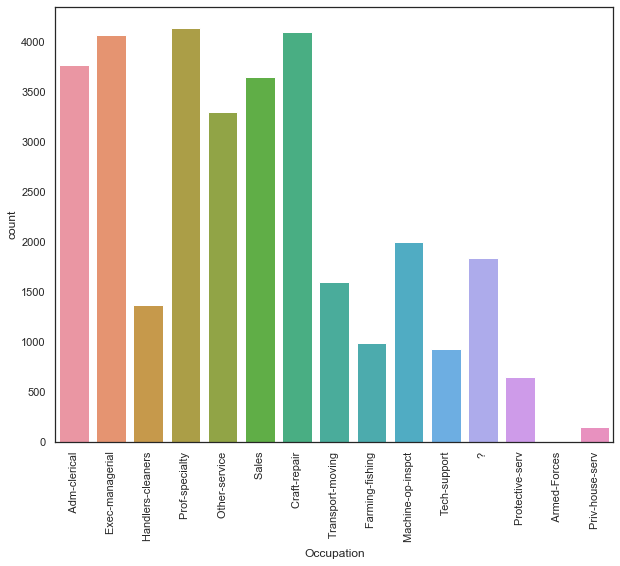

In [22]:
sns.countplot(train.Occupation)
plt.xticks(rotation = 90)

We observe that majority of people lies in 'prof-Speciality' occupation followed by 'Craft-repair' and 'Exec-managerial'.
We also observe '?' here , we will treat them in our next section.

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

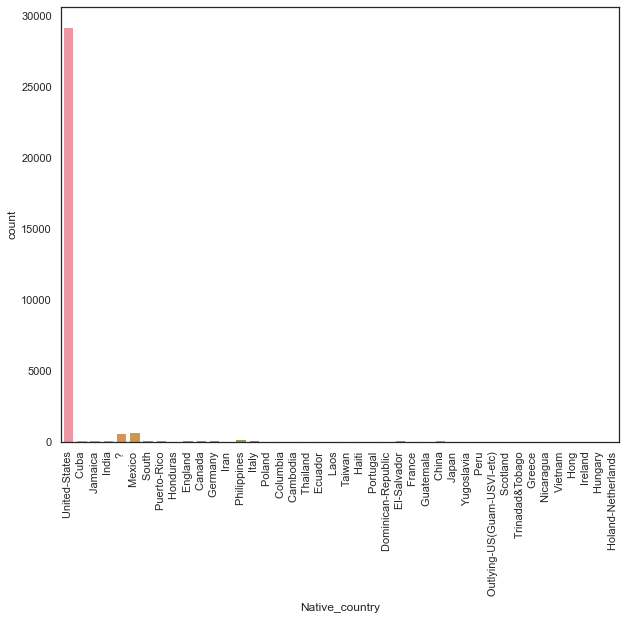

In [23]:
sns.countplot(train.Native_country)
plt.xticks(rotation = 90)

Majority of the people in our sample are from United States followed by Mexico, Philippines.

C:\Users\Goels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


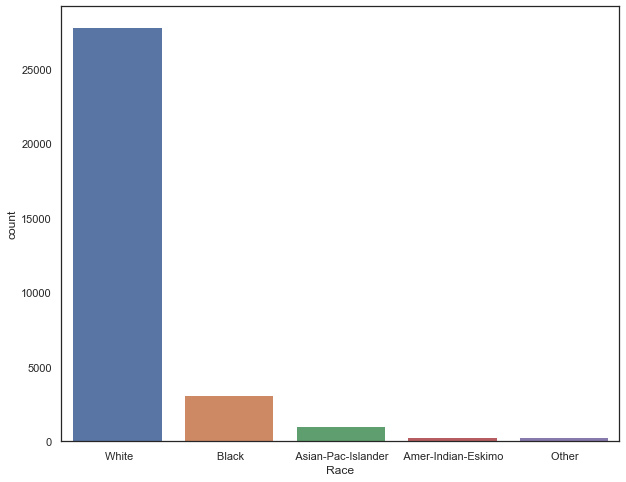

In [24]:
sns.countplot(train.Race)

Majority of the people in our sample are White followed by Black and Asian-Pac-Islander. 

### Income with other features

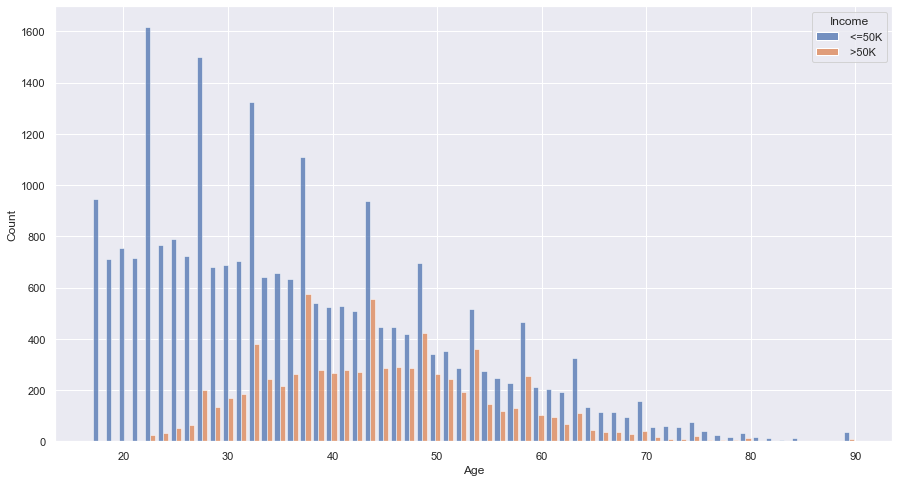

In [55]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.histplot(data=train, x="Age", hue = "Income", multiple="dodge", shrink=.8)

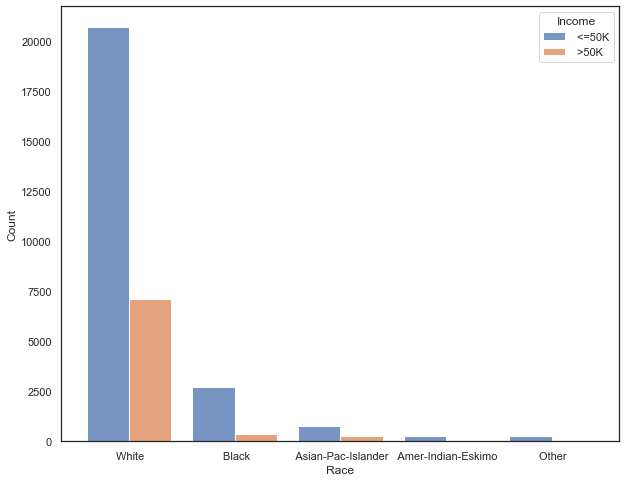

In [48]:
sns.histplot(data=train, x="Race", hue = "Income", multiple="dodge", shrink=.8)

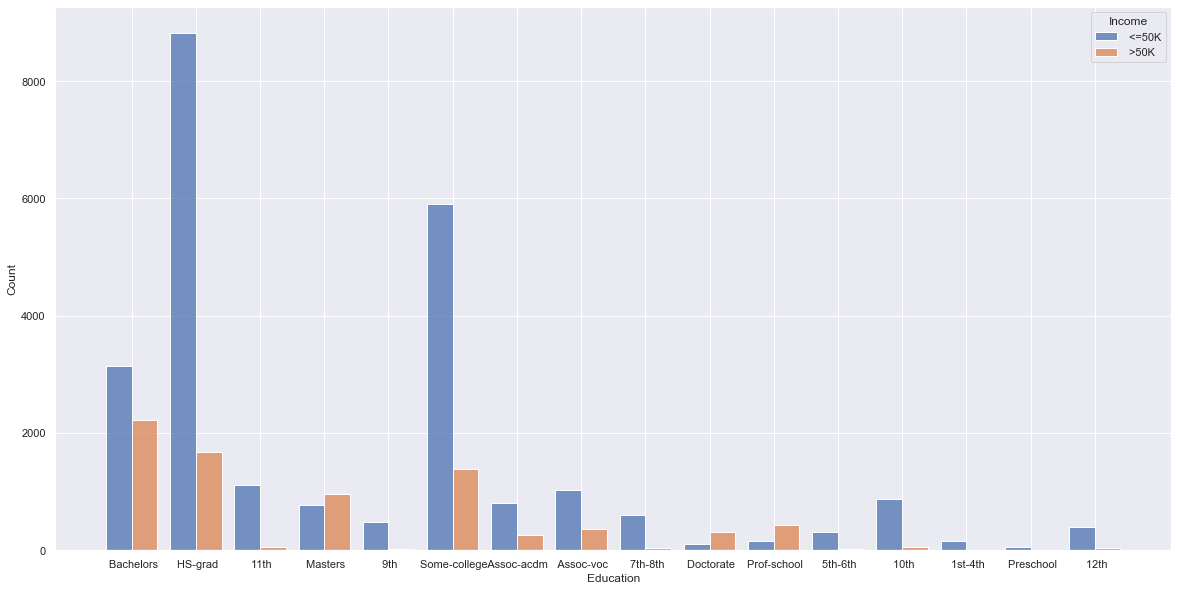

In [52]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.histplot(data=train, x="Education", hue = "Income", multiple="dodge", shrink=.8)

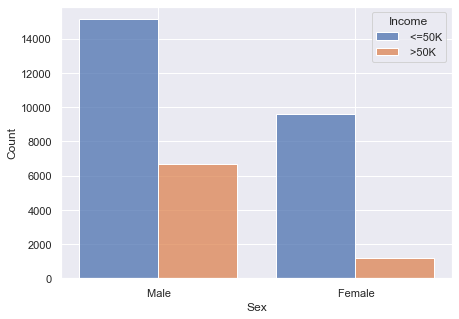

In [60]:
sns.set(rc = {'figure.figsize':(7, 5)})
sns.histplot(data=train, x="Sex", hue = "Income", multiple="dodge", shrink=.8)

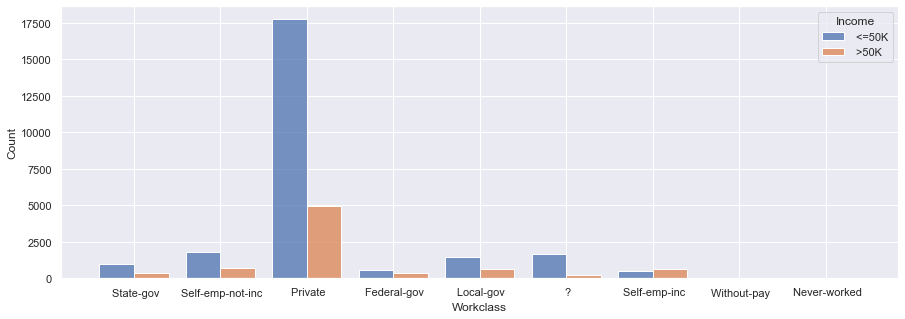

In [63]:
sns.set(rc = {'figure.figsize':(15, 5)})
sns.histplot(data=train, x="Workclass", hue = "Income", multiple="dodge", shrink=.8)

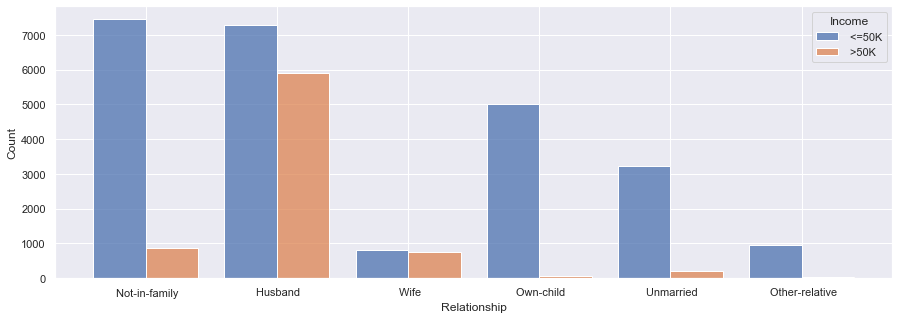

In [64]:
sns.set(rc = {'figure.figsize':(15, 5)})
sns.histplot(data=train, x="Relationship", hue = "Income", multiple="dodge", shrink=.8)

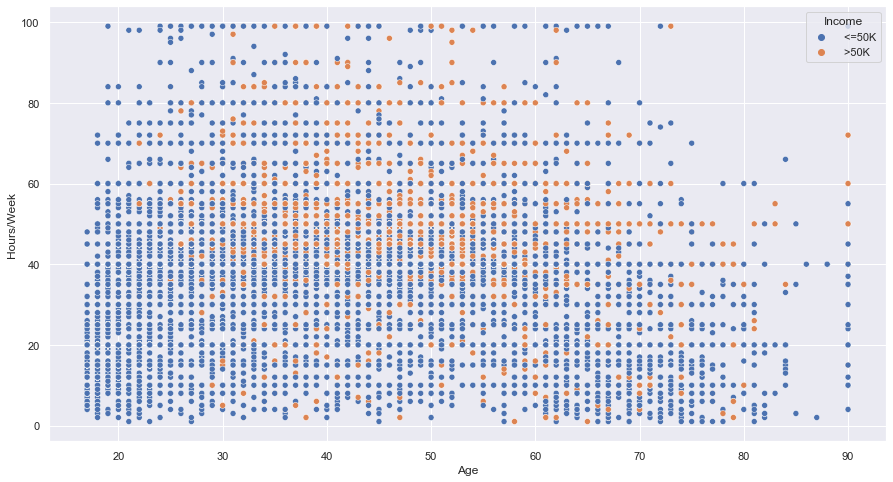

In [70]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(data=train, x="Age", y = "Hours/Week" ,hue = "Income")

<b> Key Inferences : </b><br>
According to the dataset taken :<br>
1) A person has high chance of earning more than 50k in case her/his race is 'White'. <br>
2) Males have higher chance of earning more than 50k than Females.<br>
3) Proportion of people earning more than 50K is higher in case the Workclass is ‘Self-emp-inc’.<br>
4) People with Bachelors degree have higher chance of earning higher than 50k.<br>
5) If a person is married has a relationship in family is "Husband" or "Wife" then they have high chance of earning mor ethan 50k.<br>
6) From the scatterplot between age, hours_per_week and income, we observe that probability of earning more than 50k, a person has to be >30 else needs to work at least 60 hours_per_week to earn >50K.


### Correlations

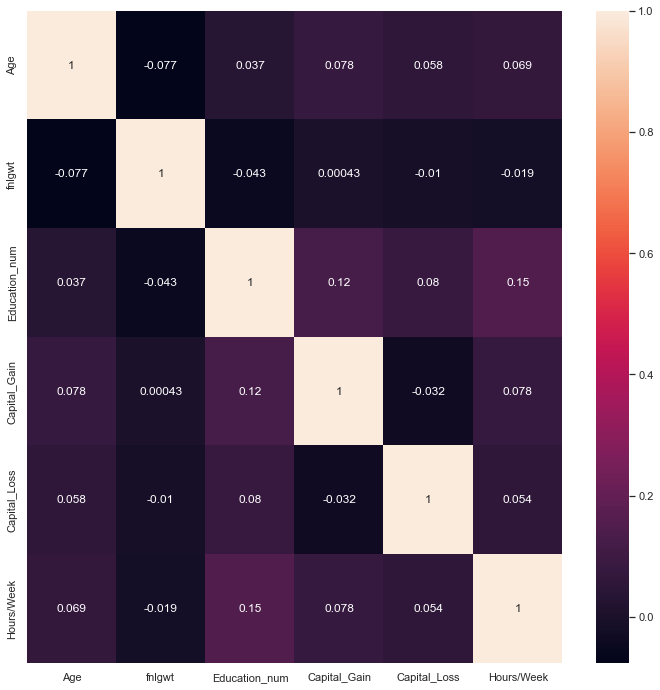

In [76]:
# Checking correlation between features

plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot=True)

# Data Cleaning and Feature Engineering

In [78]:
#counting the number of ? in train data
print("Counting the number of ? in the train data:")
print("Workclass :",train[train['Workclass']==" ?"].shape[0])
print("Occupation :",train[train['Occupation']==" ?"].shape[0])
print("Native Country :", train[train['Native_country']==" ?"].shape[0])

Counting the number of ? in the train data:
Workclass : 1836
Occupation : 1843
Native Country : 583


In [ ]:
#replacing ? with mode of observations
for i in range(train.shape[1]):
    train.iloc[:,i]=train.iloc[:,i].replace(" ?",train.iloc[:,i].mode()[0])
for i in range(test.shape[1]):
    test.iloc[:,i]=test.iloc[:,i].replace(" ?",test.iloc[:,i].mode()[0])

In [79]:
# Feature engineering
train['Income']=train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income']=test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

In [80]:
test['Income'].value_counts()

0    12435
1     3846
Name: Income, dtype: int64

In [81]:
#combining train and test dataset
joined = pd.concat([train,test])
joined.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [82]:
joined.describe

<bound method NDFrame.describe of        Age          Workclass  fnlgwt   Education  Education_num  \
0       39          State-gov   77516   Bachelors             13   
1       50   Self-emp-not-inc   83311   Bachelors             13   
2       38            Private  215646     HS-grad              9   
3       53            Private  234721        11th              7   
4       28            Private  338409   Bachelors             13   
...    ...                ...     ...         ...            ...   
16276   39            Private  215419   Bachelors             13   
16277   64                  ?  321403     HS-grad              9   
16278   38            Private  374983   Bachelors             13   
16279   44            Private   83891   Bachelors             13   
16280   35       Self-emp-inc  182148   Bachelors             13   

            Marital_Status          Occupation     Relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married

In [83]:
joined.dtypes

Age                int64
Workclass         object
fnlgwt             int64
Education         object
Education_num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours/Week         int64
Native_country    object
Income             int64
dtype: object

In [84]:
#creating a list for categorical variables
cat = [column for column in joined if joined[column].dtype=='object']
#cat = joined.select_dtypes(include=['object']).axes[1]
cat

['Workclass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [85]:
for i in cat:
    joined = pd.concat([joined,pd.get_dummies(joined[i],prefix=i,prefix_sep=":")],axis=1)
    joined.drop(i,axis=1,inplace=True)

In [86]:
joined.head()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week,Income,Workclass: ?,Workclass: Federal-gov,Workclass: Local-gov,...,Native_country: Portugal,Native_country: Puerto-Rico,Native_country: Scotland,Native_country: South,Native_country: Taiwan,Native_country: Thailand,Native_country: Trinadad&Tobago,Native_country: United-States,Native_country: Vietnam,Native_country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#separating train and test datasets
train = joined.head(train.shape[0])
test = joined.tail(test.shape[0])

In [88]:
ytrain = train['Income']
xtrain = train.drop(['Income'],axis=1)
ytest = test['Income']
xtest = test.drop('Income',axis=1)

In [89]:
#using Standard Scaler to scale all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest=scaler.transform(xtest)

# Model Building and Evaluation

In [90]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
#creating an instance of model
dt_model = DecisionTreeClassifier(random_state=12)

In [92]:
#fitting the model
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=12)

In [93]:
#scoring the model on train data
dt_model.score(xtrain,ytrain)

0.9999692884125181

In [94]:
#scoring the model on test data
dt_model.score(xtest,ytest)

0.8093483201277563

In [95]:
#predicting the target variable in test dataset
y_pred_test = dt_model.predict(xtest)
y_pred_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

# Building Confusing Matrix

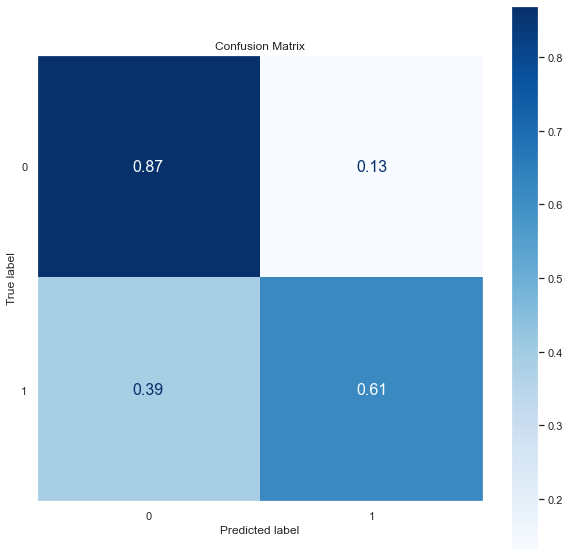

In [96]:
# Displaying the confusion Matrix

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(dt_model, xtest, ytest, display_labels = ["0","1"], cmap=plt.cm.Blues, normalize="true", ax=ax)
plt.title("Confusion Matrix");
plt.grid(False)
plt.show()

# Classification Matrix

In [97]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

In [98]:
dt_eval = evaluate_model(dt_model, xtest, ytest)

# Print results
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])

Accuracy: 0.8093483201277563
Precision: 0.593169261677549
Recall: 0.6141445657826313
F1 Score: 0.6034747061829331
Cohens Kappa Score: 0.4780292995555254
Area Under Curve: 0.7419335615402903


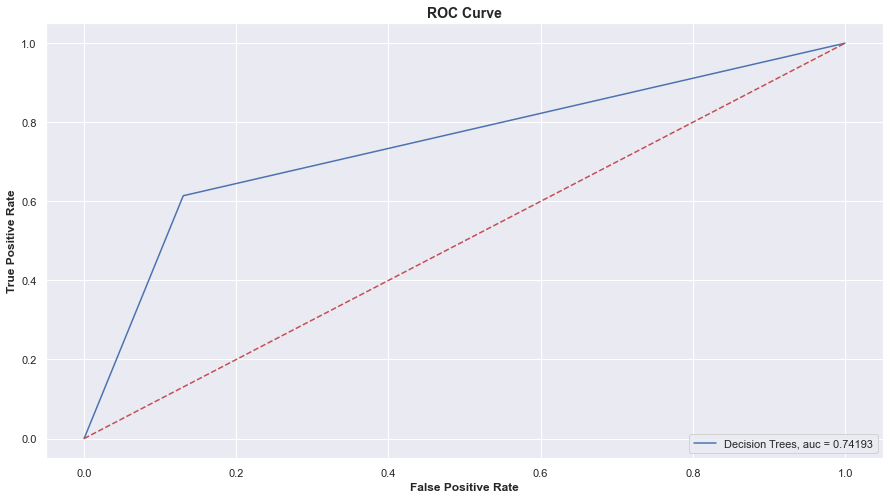

In [99]:
#plotting ROC curve
plt.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Trees, auc = {:0.5f}'.format(dt_eval['auc']))

## Configure x and y axis

plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc=4)

plt.plot([0, 1], [0, 1],'r--')
plt.show()